### Conversion between pixel and camera coordinates


In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

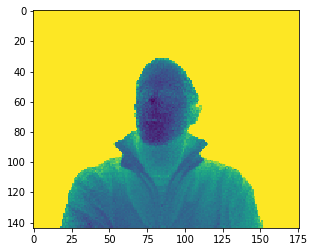

In [ ]:
# load matrix
data = np.load("/content/cs4250/data/exercise_2/ueb24.npy")

plt.imshow(data, interpolation='none')
plt.show()

# define constants
f = 8e-3                   #focal length
s = 4e-5                   #pixel_size
c = np.array([71.5,87.5])  #x coordinate of centre of image

# Create 3 2d-Matrices, each containing the x,y and z value of a vector respecitively. 
# Those vectors are supposed to "point at" the image pixels from the centre of focus.
#x = np.random.rand(10,10)
#y = np.random.rand(10,10)
#z = np.random.rand(10,10)

X = []
Y = []
Z = []
background = data.max()

for m in range(data.shape[0]):
  for n in range(data.shape[1]):
    r = data[m][n]
    if r == background:
      continue
    a = s*(m-c[0])
    b = -s*(n-c[1])
    f_hypo = np.sqrt(a**2 + b**2 + f**2) # distance of image pixel from center of focus
    x = a *(r/f_hypo)
    y = b *(r/f_hypo)
    z = f *(r/f_hypo)
    X.append(x)
    Y.append(y)
    Z.append(z)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

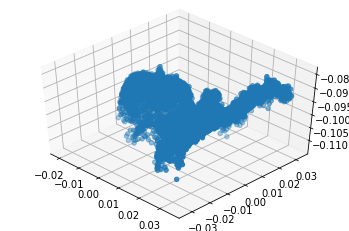

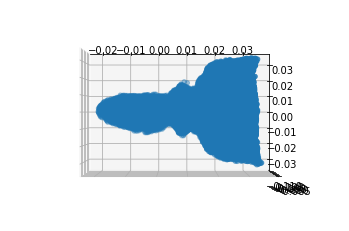

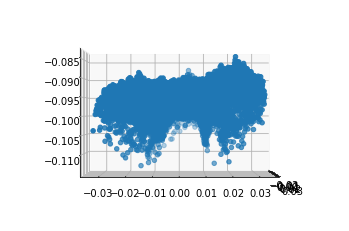

In [ ]:
# if you're not using the notebook in Colab, you can use "%matplotlib notebook"
# to create an interactive plot that can be rotated 
%matplotlib inline
def plot_3d(x,y,z,elev, azim):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(elev=elev, azim=azim)
  ax.scatter(x,y,-z,cmap=cm.coolwarm)


plot_3d(X, Y, Z, 45, -45)
plot_3d(X, Y, Z, 90, -90)
plot_3d(X, Y, Z, 0, 0)